In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons, make_blobs # toy dataset
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN # clustering algorithm
from scipy.cluster.hierarchy import dendrogram, linkage # 계층적 군집화 관련 library
from sklearn.metrics import silhouette_score # 실루엣 스코어
from sklearn.neighbors import NearestNeighbors 

In [2]:
# 토이 데이터셋
data, label = make_blobs(n_samples=300, n_features=2, random_state=12)

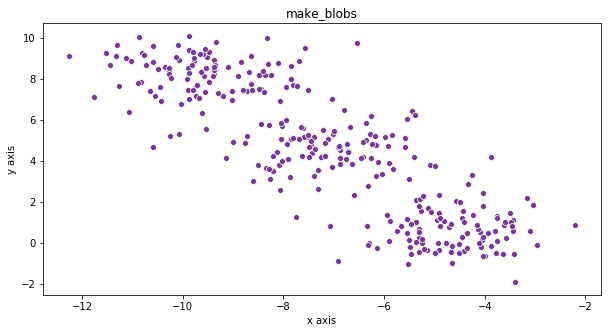

In [3]:
# 산점도 그려보기
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], color='#78389B')
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("make_blobs")
plt.show()

# 1. 계층적 군집화
중복을 허용하여 clustering 하는 방법 (=군집 내에 군집이 속할 수 있음)
일정 높이에서 dendrogram을 잘라서 군집의 수 결정한다.

1. 거리를 측정하는 방법
    - L1 norm (manhattan distance)
    - L2 norm (euclidean distance)
    - mahalanobis (feature간의 공분산 행렬을 고려한 거리)
2. cluster 간의 거리를 측정하는 방법
    - single linkage (군집 간 element끼리의 거리 중 min을 군집 간 거리로 설정)
    - complete linkage (군집 간 element끼리의 거리 중 max를 군집 간 거리로 설정)
    - average linkage (군집 간 element끼리의 모든 거리를 average)
    - centroid (군집의 centroid끼리의 거리)

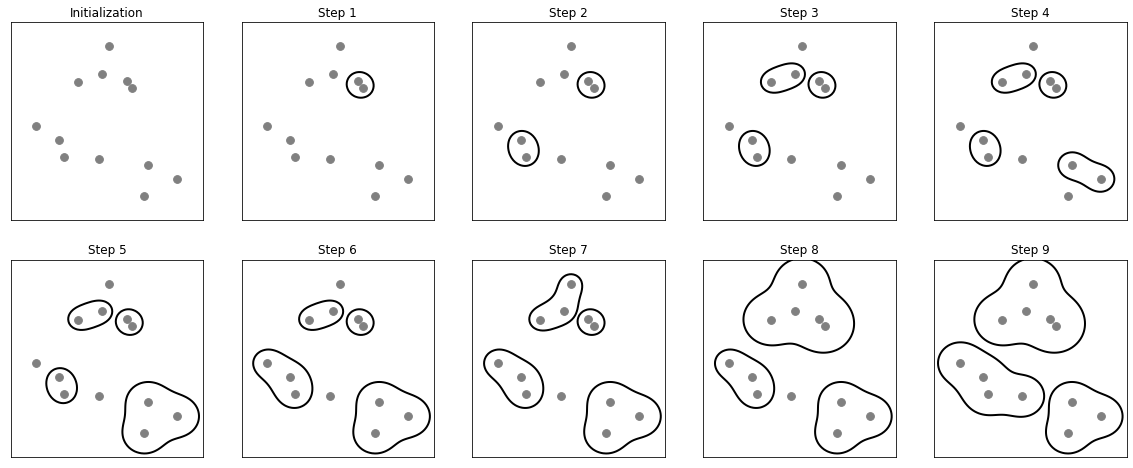

In [4]:
# 실행하지 마시고, 그냥 출력된 결과만 확인해주세요 
# import mglearn
# mglearn.plots.plot_agglomerative_algorithm()

In [5]:
# n_clusters, linkage, affinity 지정
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="euclidean")

In [6]:
# 클러스터링 수행
label = agg_clustering.fit_predict(data)

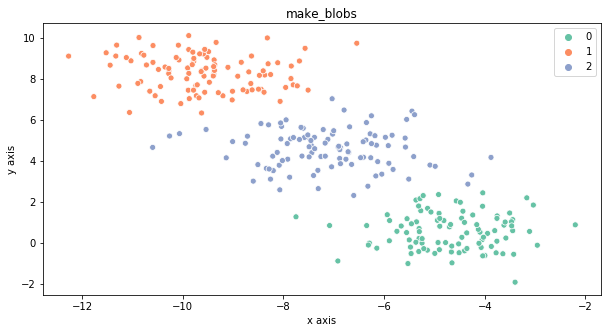

In [7]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("make_blobs")
plt.show()

In [8]:
linkage_array = linkage(data, method='average', metric='euclidean') # linkage matrix 반환

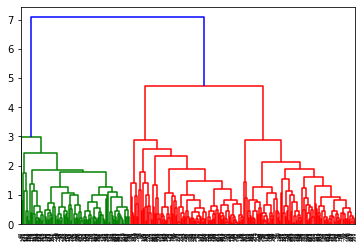

In [9]:
dn = dendrogram(linkage_array)

# 2. K-means
- **k-means**는 비계층적 군집화 방법 중 **distance 기반 알고리즘**에 속한다.  
- 1. kmenas는 **k개의 init centroid**를 설정
- 2. 각각의 데이터를 가까운 centroid **cluster로 할당**
- 3. cluster 내 **centorid를 update**
- 4. 다시 각각의 데이터를 가까운 centroid cluster로 할당하는 **과정을 반복**한다.  
- 이 과정을 centorid가 변하지 않을 때 까지 반복 수행된다.
<br><br>
- kmeans에서 중요한 변수는 군집의 개수인 **K**와 **init centroid**이다.
- init centroid가 어디인지에 따라 최종 수렴된 clustering 결과가 달라질 수 있기 때문에 일부 데이터를 sampling해 hierarchical clusteirng을 수행한 후, 이에 기반해 init centorid를 지정하기도 한다.  
- scikit learn의 KMeans ‘k-means++’ 방법으로 초기 centroid를 결정하는데, 이 방법은 k개의 초기 centroid를 결정할 때 centroid_1 하나 지정하고 그 다음 centorid_2는 **이전의 centroid_1와 멀리 떨어지게 잡는 것**이다.  
- 또한 군집의 수인 K는 x축을 K, y축을 군집 내 거리 제곱합의 합으로 두고 급격하게 꺽이는 elbow point를 찾는다.  

In [10]:
kmeans = KMeans(n_clusters=2) # 객체생성

In [11]:
label = kmeans.fit_predict(data) # 학습 & 예측

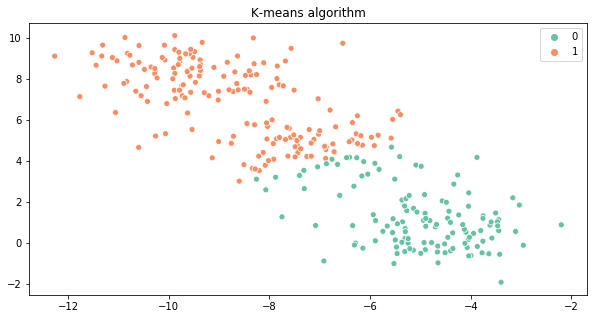

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_title("K-means algorithm")
plt.show()

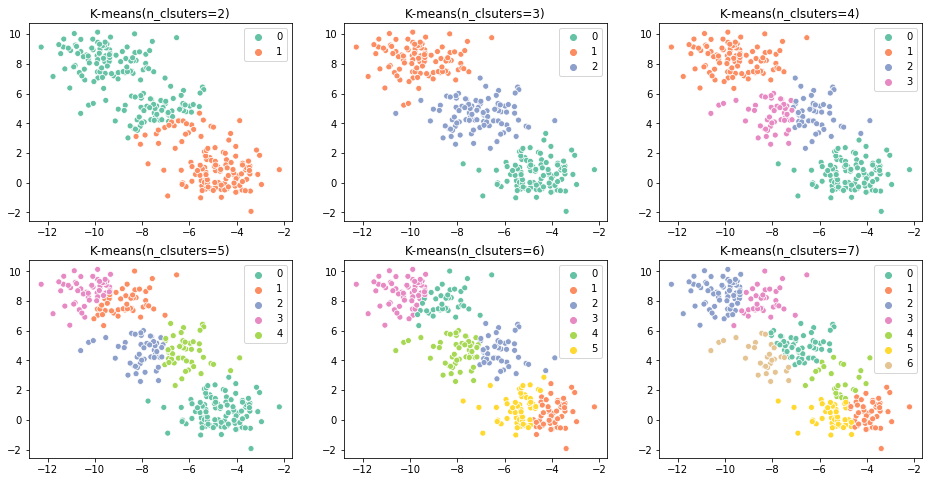

In [13]:
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
for i, n_cluster in enumerate(range(2, 8)):
    row = i//ncols
    col = i%ncols
    kmeans = KMeans(n_clusters=n_cluster)
    label = kmeans.fit_predict(data)
    sns.scatterplot(data[:, 0], data[:, 1], hue=label, ax=axes[row][col], palette='Set2')
    axes[row][col].set_title(f"K-means(n_clsuters={n_cluster})")

In [14]:
inertia = []
silhouette = []
for i, n_cluster in enumerate(range(2, 10)):
    kmeans = KMeans(n_clusters=n_cluster)
    label = kmeans.fit_predict(data)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data, label))

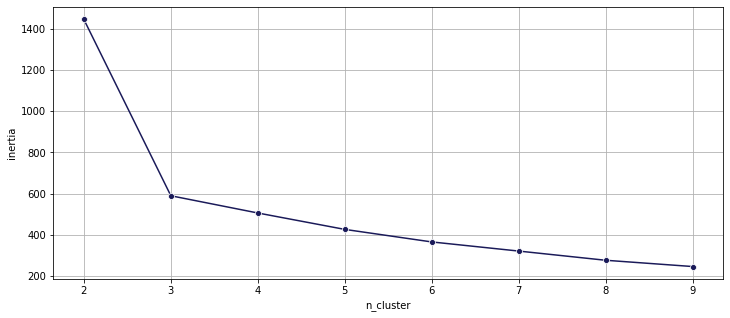

In [15]:
# inertia 확인
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=range(2, 10), y=inertia, marker='o', color='#1A1A59')
ax.set_xlabel("n_cluster")
ax.set_ylabel("inertia")
ax.grid(True)
plt.show()

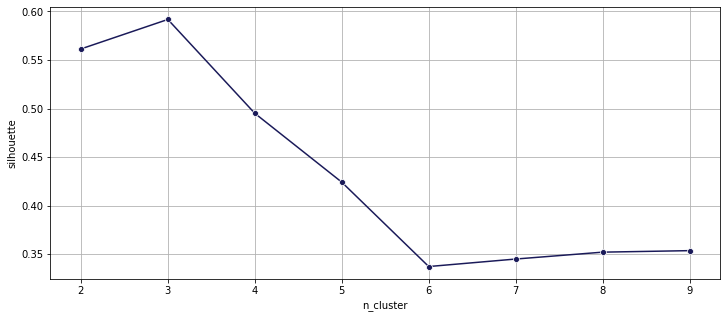

In [16]:
# 실루엣 지수 확인
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=range(2, 10), y=silhouette, marker='o', color='#1A1A59')
ax.set_xlabel("n_cluster")
ax.set_ylabel("silhouette")
ax.grid(True)
plt.show()

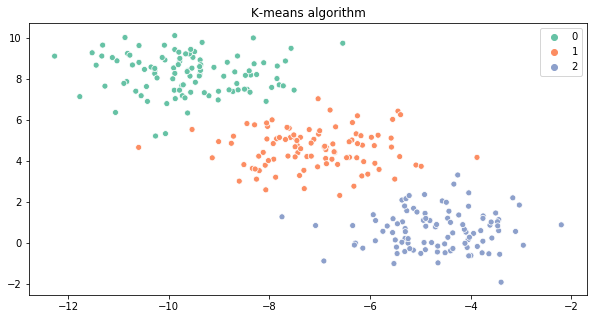

In [17]:
kmeans = KMeans(n_clusters=3) # 객체생성
label = kmeans.fit_predict(data) # 학습 & 예측

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_title("K-means algorithm")
plt.show()

# 3. DBSCAN
dbscan은 clustering 방법 중 partitional clustering에 속하며 밀도 기반 알고리즘이다.  
dbscan에서 중요한 hyperparameter는 minpts와 eps이다.  

dbscan은 eps, minpts에 기반하여 모든 데이터를 core point, border point, noise point로 구분한다.  
- **core point** : eps 반경 내에 minpts 이상개의 데이터 보유
- **border point** : eps 반경 내에 minpts개의 데이터는 없지만, core point를 neighbor로 가진다.
- **noise point** : eps 반경 내에 minpts개의 데이터도 없고, core point도 neighbor로 가지지 않는다.

core point가 다른 core point의 eps 반경내에 포함되면 하나의 cluster가 되는 방향으로 군집을 형성해 나간다.    
이 때 border point는 cluster의 경계를 형성하는 역할을 하며, noise point는 어떠한 cluster에도 포함되지 않는다.  

eps와 minpts는 k-dist를 통해 적절한 값이 결정된다.  
각 데이터마다 k번째로 가까운 거리를 구하고, 이 거리를 정렬하여 plot을 그린다.  
이 때 급격히 k-dist가 증가할 때 이 때의 dist값이 eps가, k가 minpts가 된다.  

In [39]:
# 데이터셋 생성
data, label = make_moons(n_samples=200, noise=0.1, random_state=0)

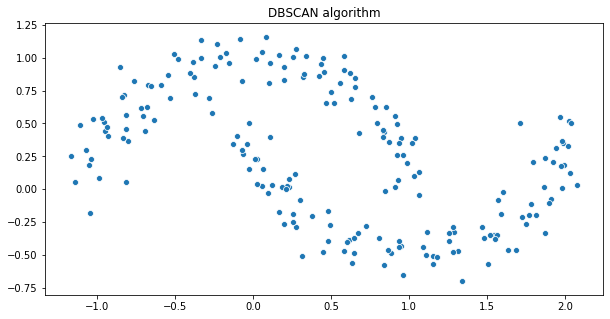

In [40]:
# 시각화
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], palette='Set2')
ax.set_title("DBSCAN algorithm")
plt.show()

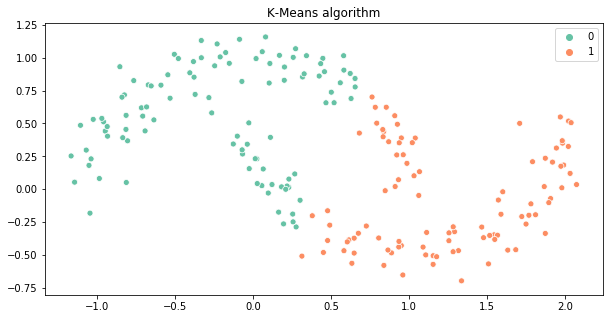

In [41]:
# KNN은 원형으로 군집을 잡아내기 때문에 다음과 같이 패턴이 있는 군집은 잘 잡아내지 못한다.
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(data)

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_title("K-Means algorithm")
plt.show()

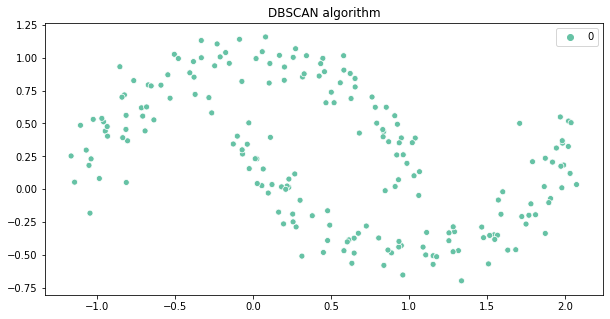

In [42]:
# DBSCAN에서 적절한 eps, min_points 설정의 중요성
dbscan = DBSCAN()
label = dbscan.fit_predict(data)

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_title("DBSCAN algorithm")
plt.show()

In [43]:
# 1. 모든 데이터에서 k번째로 가까운 데이터와의 거리를 구하고
# 2. 이 거리를 오름차순 정렬해서 plotting
# 3. 거리가 급격하게 증가하는 시점에서의 거리를 eps로 설정

neighbor = NearestNeighbors(n_neighbors=5)
neighbor.fit(data)
neigh_dist, neigh_ind = neighbor.kneighbors(data)

- neigh_dist : array, shape (n_queries, n_neighbors) Array representing the **lengths to points** 
- neigh_ind : array, shape (n_queries, n_neighbors) **Indices of the nearest points** in the population matrix.

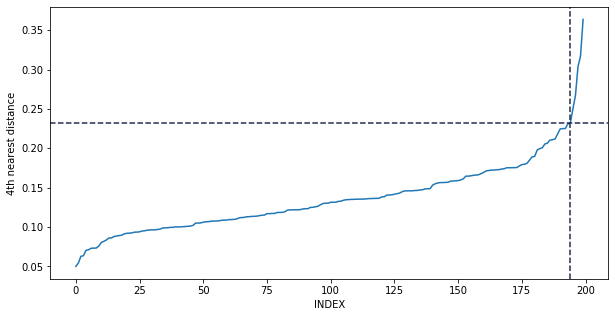

EPS >  0.2324612034289954


In [44]:
select_x = 194

plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=range(neigh_dist.shape[0]), y=np.sort(neigh_dist[:, 4]))
ax.axvline(x=select_x, color="#242A4D", linestyle='--')
ax.axhline(y=np.sort(neigh_dist[:, 4])[select_x], color="#242A4D", linestyle='--')
ax.set_xlabel("INDEX")
ax.set_ylabel("4th nearest distance")
plt.show()

print("EPS > ", np.sort(neigh_dist[:, 4])[select_x])

# K = 4
# eps = 0.18

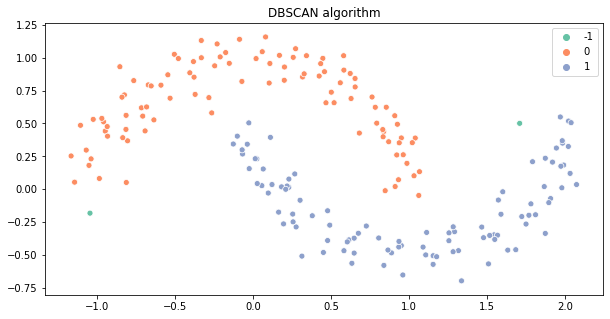

In [45]:
# 적절하다고 판단되는 eps, min_samples로 DBSCAN 다시 수행하였더니 이전보다 더 좋은 결과 도출!
dbscan = DBSCAN(eps=0.23, min_samples=4)
label = dbscan.fit_predict(data)

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data[:, 0], data[:, 1], hue=label, palette='Set2')
ax.set_title("DBSCAN algorithm")
plt.show()

In [46]:
# -1은 noise point
pd.Series(label).value_counts()

 0    100
 1     98
-1      2
dtype: int64